In [9]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Random policy

In [19]:
"""Evaluate random policy"""
total_epochs, total_rewards = 0,0
episodes = 100

tic = time.perf_counter()
#loop through 100 episodes
for _ in range(episodes):
    #set current state to starting environment
    state = env.reset()
    epochs = 0
    
    #done = reach the goal
    done = False
    
    episode_reward = 0
    #while not reach the goal
    while not done:
        #select a random action
        action = env.action_space.sample()
        
        #apply the action
        state, reward, done, info = env.step(action)
        
        episode_reward += reward

        #increment epochs
        epochs += 1

    #after 1 episode, sum penalties and episodes
    total_epochs += epochs
    total_rewards += episode_reward

toc = time.perf_counter()
average_time = (toc - tic)/episodes
#print evaluation of agents performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average reward per episode: {total_rewards / episodes}")
print(f"Average time per episode: {average_time:0.4f} seconds")

Results after 100 episodes:
Average timesteps per episode: 7.74
Average reward per episode: 0.03
Average time per episode: 0.0003 seconds


# Q-learning

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=False)
env.render()


SFFF
FHFH
FFFH
HFFG


- S means the starting point
- H means the hole
- F means the frozen lake
- G means the goal location
- The red square indicates the current location of agent

In [3]:
#Create a q_table of size 16 x 4
q_table = np.zeros((env.observation_space.n,env.action_space.n))

In [4]:
%%time
# Hyperparameters
lr = 0.5      
discount = 1 
epsilon = 0.1

total_rewards = []
for _ in range(10000):
    state = env.reset()
    done = False
    
    total_rewards.append("0") #At the beginning, consider no rewards
    while not done:
        #Select action
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state]) # Exploit learnt values
        else:
            action = env.action_space.sample() # Explore action space
        
        #Implement the action
        new_state, reward, done, info = env.step(action)
        
        #Update q value
        old_value = q_table[state, action]
        next_max = np.max(q_table[new_state])
        new_value = (1 - lr) * old_value + lr * (reward + discount * next_max)
        q_table[state, action] = new_value #update new q value
        
        #Move to next state
        state = new_state
        
        #If there is reward
        if reward:
            total_rewards[-1] = "1"

print("Training finished.")

Training finished.
Wall time: 2.95 s


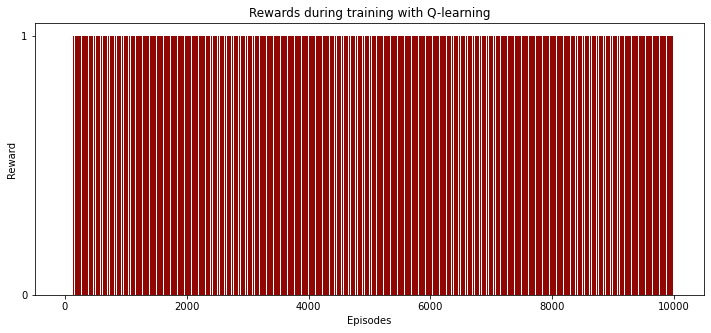

In [7]:
# Plot total rewards during training
plt.figure(figsize=(12, 5))
plt.bar(range(len(total_rewards)), total_rewards, color = "#900603")
plt.title("Rewards during training with Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.show()

In [14]:
'''Evaluate agent's performance'''
episodes = 100

total_epochs, total_rewards = 0,0
tic = time.perf_counter()
for i in range(100):
    state = env.reset()
    done = False
    
    epochs, rewards = 0,0
    while not done: 
        if np.max(q_table[state]) < 0: #If no action with highest value, select random action
            action = np.env.action_space.sample()
        else:            
            action = np.argmax(q_table[state]) #Otherwise, choose action with highest q-value
        #Implement the action    
        next_state, reward, done, info = env.step(action)
        
        #Move to next state
        state = next_state
        
        epochs += 1
        rewards += reward
    #After 1 episode, update total epochs
    total_epochs+=epochs
    total_rewards+=rewards

toc = time.perf_counter()
average_time = (toc - tic)/episodes
#print evaluation of agents performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average reward per episode: {total_rewards / episodes}")
print(f"Average time per episode: {average_time:0.4f} seconds")

Results after 100 episodes:
Average timesteps per episode: 6.0
Average reward per episode: 1.0
Average time per episode: 0.0003 seconds
